In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import joblib



In [2]:
df = pd.read_csv('../../dataset/weatherClean.csv')

In [3]:
df.describe()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.221213,12.186400,2.349974,5.302343,7.377594,9.433756,39.984292,8.202239,9.092649,14.001988,18.637576,68.843810,51.482606,1017.653758,4.389750,4.258511,0.221213,0.224181,6.402544
std,0.064960,6.388924,8.423217,4.147637,3.898898,5.188836,13.138385,5.515461,5.107987,8.851082,8.721551,18.932077,20.532065,6.746248,2.879055,2.745819,0.415065,0.417043,3.426506
min,0.067224,-8.500000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.185234,7.600000,0.000000,2.400000,4.400000,5.000000,31.000000,3.000000,5.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,0.222714,12.000000,0.000000,4.400000,8.100000,9.000000,39.000000,8.000000,8.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,5.000000,5.000000,0.000000,0.000000,6.000000
75%,0.266917,16.800000,0.800000,7.200000,10.500000,15.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,7.000000,7.000000,0.000000,0.000000,9.000000
max,0.363151,33.900000,371.000000,145.000000,14.500000,18.000000,135.000000,18.000000,18.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,9.000000,9.000000,1.000000,1.000000,12.000000


In [4]:
df.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
0,0.158714,18.2,0.0,10.0,0.0,1,48.0,1,18,26.0,22.0,17.0,9.0,1017.653758,0.0,7.0,0,0,3
1,0.067224,25.1,0.0,11.6,0.0,7,41.0,5,7,24.0,6.0,14.0,9.0,1012.800000,0.0,7.0,0,0,1
2,0.074293,21.1,0.0,14.8,0.0,12,70.0,17,17,26.0,19.0,13.0,9.0,1009.900000,0.0,7.0,0,0,11
3,0.067224,20.1,0.0,10.4,0.0,2,52.0,2,16,19.0,28.0,21.0,9.0,1002.500000,0.0,7.0,0,0,2
4,0.256935,9.0,0.0,13.2,0.0,16,89.0,1,17,30.0,41.0,33.0,13.0,1006.100000,0.0,7.0,0,0,12


In [5]:
Y = df['RainTomorrow']
X = df.drop('RainTomorrow', axis=1)
feature_names = X.columns
X.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month
0,0.158714,18.2,0.0,10.0,0.0,1,48.0,1,18,26.0,22.0,17.0,9.0,1017.653758,0.0,7.0,0,3
1,0.067224,25.1,0.0,11.6,0.0,7,41.0,5,7,24.0,6.0,14.0,9.0,1012.800000,0.0,7.0,0,1
2,0.074293,21.1,0.0,14.8,0.0,12,70.0,17,17,26.0,19.0,13.0,9.0,1009.900000,0.0,7.0,0,11
3,0.067224,20.1,0.0,10.4,0.0,2,52.0,2,16,19.0,28.0,21.0,9.0,1002.500000,0.0,7.0,0,2
4,0.256935,9.0,0.0,13.2,0.0,16,89.0,1,17,30.0,41.0,33.0,13.0,1006.100000,0.0,7.0,0,12


In [6]:
#nemamo balansirane rezultate, pa moramo da koristimo stratifikovanu podelu
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

print(X_train.shape)
print(X_test.shape)


(106644, 18)
(35549, 18)


In [7]:
X_train.describe()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,0.221288,12.184655,2.349077,5.304830,7.372220,9.432898,39.990354,8.197320,9.102059,14.018519,18.636957,68.858269,51.501083,1017.649075,4.394647,4.259804,0.222113,6.401382
std,0.064919,6.397794,8.338868,4.148628,3.899083,5.184791,13.160175,5.514755,5.110432,8.871163,8.731449,18.943706,20.559513,6.758492,2.879458,2.743398,0.415669,3.425475
min,0.067224,-8.500000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,982.000000,0.000000,0.000000,0.000000,1.000000
25%,0.185234,7.600000,0.000000,2.400000,4.400000,5.000000,31.000000,3.000000,5.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1.000000,1.000000,0.000000,3.000000
50%,0.222714,12.000000,0.000000,4.400000,8.100000,9.000000,39.000000,8.000000,8.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,5.000000,5.000000,0.000000,6.000000
75%,0.266917,16.800000,0.800000,7.200000,10.500000,15.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,7.000000,7.000000,0.000000,9.000000
max,0.363151,33.900000,278.400000,145.000000,14.500000,18.000000,135.000000,18.000000,18.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,9.000000,9.000000,1.000000,12.000000


In [8]:
def find_boundaries(df, name):
    
    Q1=df[name].quantile(0.25)
    Q3=df[name].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary


In [9]:
def outliers(name,df):
    lower_rainfall, upper_rainfall = find_boundaries(df, name)
    print('Gornja granica', upper_rainfall)
    print('Donja granica', lower_rainfall)
    outliers_rainfall = np.where(df[name] > upper_rainfall, True,
                            np.where(df[name] < lower_rainfall, True, False))

    print(outliers_rainfall)
    return len(df[outliers_rainfall]), outliers_rainfall




In [10]:
#l, out = outliers('WindSpeed3pm',X_train)
#X_train = X_train[~(out)]
#Y_train = Y_train[~(out)]
#print(len(df))

l, out = outliers('Evaporation',X_train)
X_train = X_train[~(out)]
Y_train = Y_train[~(out)]
print(len(df))

#l, out = outliers('Rainfall',X_train)
#X_train = X_train[~(out)]
#Y_train = Y_train[~(out)]
#print(len(df))

l, out = outliers('WindSpeed9am',X_train)
X_train = X_train[~(out)]
Y_train = Y_train[~(out)]
print(len(df))

Gornja granica 14.400000000000002
Donja granica -4.800000000000001
[False False False ... False False False]
142193
Gornja granica 37.0
Donja granica -11.0
[False False False ... False False False]
142193


In [11]:
X_train.shape
Y_train.shape

(102702,)

Normalizacija

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.max()

34.06774079126249

In [14]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
        
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['No', 'Yes'], index=['No', 'Yes']))
    print("---------------------------------------------------------------------------------")
    
    cm_matrix = pd.DataFrame(confusion_matrix(y, y_pred), index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    

KNN

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train) # treninranje modela


KNeighborsClassifier()

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     79694
           1       0.80      0.61      0.69     23008

    accuracy                           0.88    102702
   macro avg       0.85      0.78      0.81    102702
weighted avg       0.87      0.88      0.87    102702

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
        No    Yes
No   76225   3469
Yes   9077  13931
---------------------------------------------------------------------------------


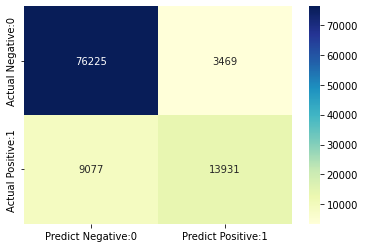

In [16]:
report(knn, X_train, Y_train)


Na trening skupu ima tacnost od 0.87

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     27580
           1       0.67      0.49      0.57      7969

    accuracy                           0.83     35549
   macro avg       0.77      0.71      0.73     35549
weighted avg       0.82      0.83      0.82     35549

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
        No   Yes
No   25662  1918
Yes   4053  3916
---------------------------------------------------------------------------------


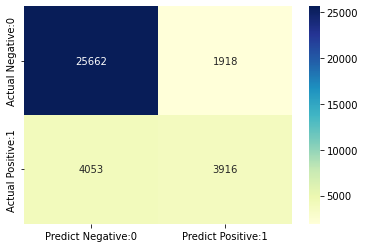

In [17]:
report(knn, X_test, Y_test)


In [18]:
def plot_imbalanced(X_train, y_train, X_resampled, y_resampled):
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    
    plt.subplot(1,2,1)
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
    
    X_resampled_pca = pca.transform(X_resampled)
    plt.subplot(1,2,2)
    plt.scatter(X_resampled_pca[:,0], X_resampled_pca[:,1], c=y_resampled)

In [19]:
def imbalanced_fit(X_train, y_train, X_test, y_test, sampler):
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    print(f'X_resampled.shape={X_resampled.shape}')
    print(f'y value counts = {y_resampled.value_counts()}')
    
    plot_imbalanced(X_train, y_train, X_resampled, y_resampled)
    
    model = KNeighborsClassifier()
    model.fit(X_resampled, y_resampled)
    
    report(model, X_test,y_test,text="test")
    
    return model

X_resampled.shape=(159388, 18)
y value counts = 0    79694
1    79694
Name: RainTomorrow, dtype: int64
Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     27580
           1       0.46      0.74      0.57      7969

    accuracy                           0.75     35549
   macro avg       0.69      0.75      0.70     35549
weighted avg       0.81      0.75      0.77     35549

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
        No   Yes
No   20700  6880
Yes   2054  5915
---------------------------------------------------------------------------------


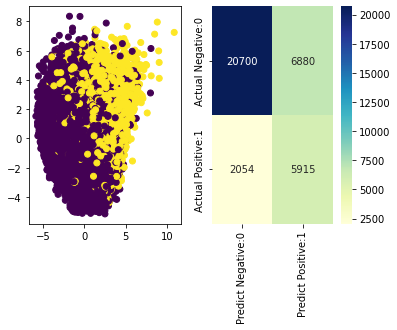

In [20]:
model_smote = imbalanced_fit(X_train, Y_train, X_test, Y_test, SMOTE())


X_resampled.shape=(46016, 18)
y value counts = 0    23008
1    23008
Name: RainTomorrow, dtype: int64
Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     27580
           1       0.49      0.75      0.59      7969

    accuracy                           0.77     35549
   macro avg       0.70      0.76      0.71     35549
weighted avg       0.82      0.77      0.78     35549

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
        No   Yes
No   21227  6353
Yes   1958  6011
---------------------------------------------------------------------------------


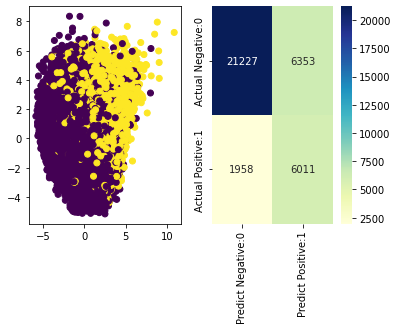

In [21]:
model_under = imbalanced_fit(X_train, Y_train, X_test, Y_test, RandomUnderSampler())


# Hiper-parametri

In [22]:
params_grid = {'n_neighbors': range(5, 25, 5),
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']}

#estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6)
estimator = GridSearchCV(model_smote, params_grid, cv=5, verbose=4,scoring='recall')


In [23]:
estimator.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.485 total time=   5.5s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.487 total time=   6.2s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.486 total time=   6.0s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.496 total time=   5.1s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.491 total time=   4.8s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.485 total time=   4.0s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.489 total time=   4.0s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.488 total time=   4.1s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.498 total time=   4.0s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.492 tot

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(5, 25, 5),
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=4)

In [24]:
#estimator.best_params_
print(estimator.best_params_)


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [25]:
estimator.best_score_


0.49235030156605786

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79694
           1       1.00      1.00      1.00     23008

    accuracy                           1.00    102702
   macro avg       1.00      1.00      1.00    102702
weighted avg       1.00      1.00      1.00    102702

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
        No    Yes
No   79694      0
Yes      2  23006
---------------------------------------------------------------------------------


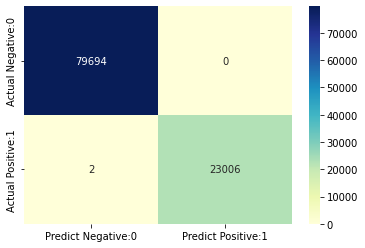

In [26]:
report(estimator.best_estimator_, X_train, Y_train)


Imamo preciznost 1 na trening skupu, da li je doslo do preprilagodjavanja?

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     27580
           1       0.69      0.49      0.57      7969

    accuracy                           0.84     35549
   macro avg       0.77      0.71      0.73     35549
weighted avg       0.82      0.84      0.82     35549

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
        No   Yes
No   25796  1784
Yes   4068  3901
---------------------------------------------------------------------------------


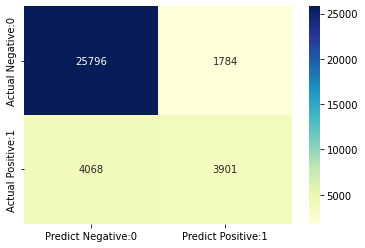

In [27]:
report(estimator.best_estimator_, X_test, Y_test,text="test")


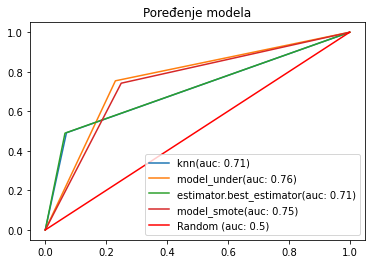

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, model_under, estimator.best_estimator_,model_smote]
model_names = ['knn', 'model_under', 'estimator.best_estimator','model_smote']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

In [29]:
with open('ModelUnderKNN.pkl', 'wb') as file:  
    joblib.dump(model_under, file)

In [30]:
with open('EstimatorBestKNN.pkl', 'wb') as file:  
    joblib.dump(estimator.best_estimator_, file)

Poredjenje stabla i KNN:

In [31]:
tree = joblib.load('BestEstimator.pkl')
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       random_state=42)

In [32]:
tree_best = joblib.load('BestEstimator.pkl')
tree_best.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       random_state=42)

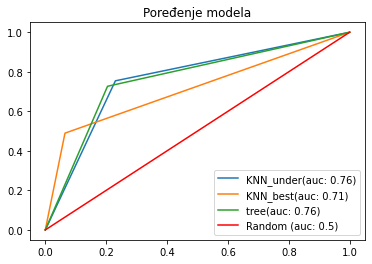

In [33]:
models = [model_under, estimator.best_estimator_,tree_best]
model_names = ['KNN_under', 'KNN_best','tree','Tree_best']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

In [34]:
def metrics(model, x, y):
    y_pred = model.predict(x)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    f1_score1 = f1_score(y, y_pred)
    
    return precision,recall,accuracy,f1_score1

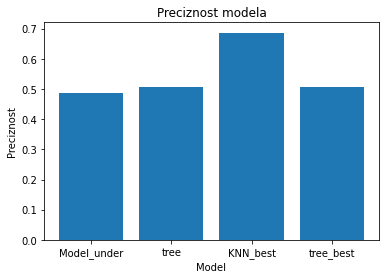

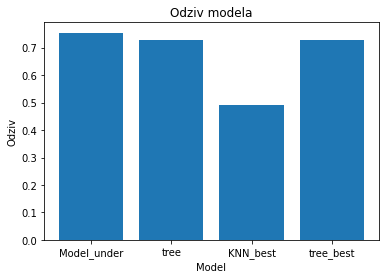

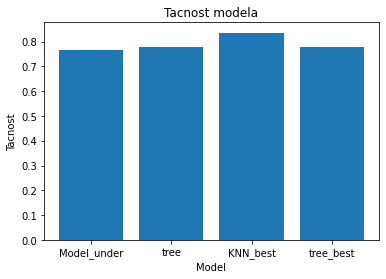

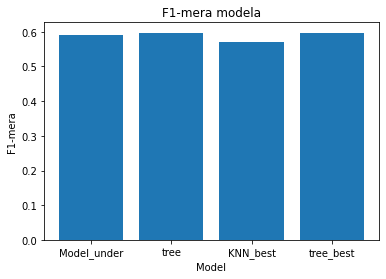

In [35]:
models = ['Model_under', 'tree', 'KNN_best','tree_best']  # Nazivi modela
precision1,recall1,accuracy1,f1_score1 = metrics(model_under, X_test, Y_test)
precision2,recall2,accuracy2,f1_score2 = metrics(tree, X_test, Y_test)
precision3,recall3,accuracy3,f1_score3 = metrics(estimator.best_estimator_, X_test, Y_test)
precision4,recall4,accuracy4,f1_score4 = metrics(tree_best, X_test, Y_test)



precisions = [precision1, precision2, precision3,precision4]  # Preciznost
recalls = [recall1, recall2, recall3,recall4]  # Odziv
accuracies = [accuracy1, accuracy2, accuracy3,accuracy4]  # Tacnost
f1_scores = [f1_score1, f1_score2, f1_score3,f1_score4]  # F1-mere

# Iscrtavanje grafika za preciznost
plt.figure()
plt.bar(models, precisions)
plt.title('Preciznost modela')
plt.xlabel('Model')
plt.ylabel('Preciznost')

# Iscrtavanje grafika za odziv
plt.figure()
plt.bar(models, recalls)
plt.title('Odziv modela')
plt.xlabel('Model')
plt.ylabel('Odziv')

# Iscrtavanje grafika za tačnost
plt.figure()
plt.bar(models, accuracies)
plt.title('Tacnost modela')
plt.xlabel('Model')
plt.ylabel('Tacnost')

# Iscrtavanje grafika za F1-meru
plt.figure()
plt.bar(models, f1_scores)
plt.title('F1-mera modela')
plt.xlabel('Model')
plt.ylabel('F1-mera')

plt.show()